Algorytm na zadania z całką

In [ ]:
#Metoda Prostokątów
import numpy as np
import matplotlib.pyplot as plt

def calka(f_x, L_prostokatow, dolna_granica, gorna_granica):
    pole = 0
    delta_x = (gorna_granica - dolna_granica)/L_prostokatow
    srodki_przedzialow = np.linspace(dolna_granica + delta_x/2, gorna_granica - delta_x/2, L_prostokatow)
    wysokosci_prostokatow = np.zeros(len(srodki_przedzialow))
    for i in range(len(srodki_przedzialow)):

        wysokosci_prostokatow[i] = f_x
        if wysokosci_prostokatow[i] < 0:
            wysokosci_prostokatow[i] = 0

        pole += delta_x * wysokosci_prostokatow[i]
    
    return pole, srodki_przedzialow, wysokosci_prostokatow

Oblicznie pola koła za pomocą całki - metodą Prostokąta

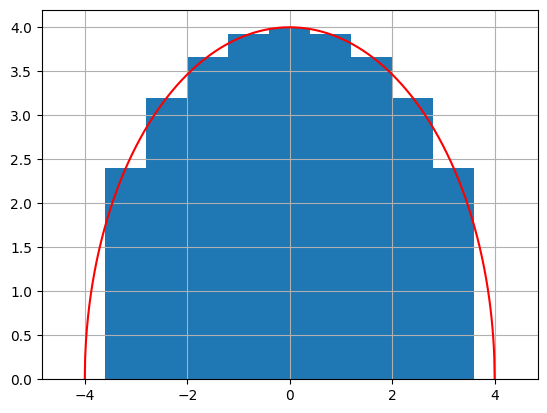

Pole kola obliczone calka: 46.672781262136816
Pole kola obliczone za pomoca biblioteki numpy: 50.26548245743669


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calka_kola(R, L):
    delta_x = (2 * R)/L
    rozmiar_przedzialu = np.linspace(-R, R, L + 1)
    pole = 0
    wysokosci_trap = np.zeros(len(rozmiar_przedzialu))
    wysokosci_trap[0] = np.sqrt(R**2 - rozmiar_przedzialu[0]**2)
    for i in range(1, L):
        wysokosci_trap[i] = np.sqrt(R**2 - rozmiar_przedzialu[i]**2)
        pole += (wysokosci_trap[i - 1] + wysokosci_trap[i])*delta_x/2
    
    return pole * 2, rozmiar_przedzialu, wysokosci_trap

L = 10
R = 4
N = 1000
x_kolo = np.linspace(-R, R, N)
y_kolo = np.zeros(N)
for i in range(N):
    y_kolo[i] = np.sqrt(R**2 - x_kolo[i]**2)

pole, rozmiar_przedzialu, wysokosci_trap = calka_kola(R, L)

plt.figure()
plt.bar(rozmiar_przedzialu, wysokosci_trap)
plt.plot(x_kolo, y_kolo, 'r')
plt. grid()
plt.show()

print(f"Pole kola obliczone calka: {pole}")
print(f"Pole kola obliczone za pomoca biblioteki numpy: {np.pi*R**2}")


Oblicznie pola koła za pomocą całki - metoda trapezu

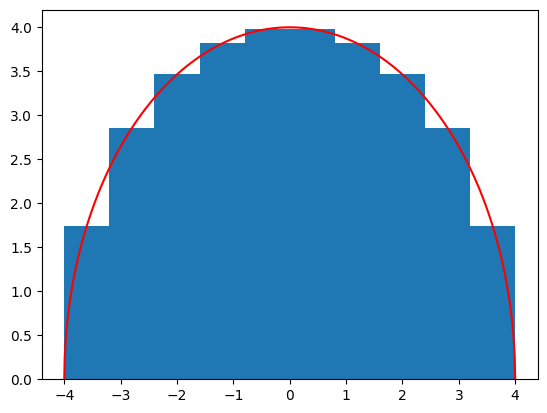

Pole kola z calki: 50.75180517780936
Pole kola z biblioteki 50.26548245743669


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def calka_kola(R, L):
    delta_x = (2 * R)/L
    rozmiar_przedzialu = np.linspace((delta_x / 2) - R, R - delta_x / 2, L)
    pole = 0
    wysokosci_prosto = np.zeros(L)
    for i in range(L):
        wysokosci_prosto[i] = np.sqrt(R**2 - rozmiar_przedzialu[i]**2)
        pole += wysokosci_prosto[i] * delta_x
    
    return pole * 2, rozmiar_przedzialu, wysokosci_prosto

L = 10
R = 4
x_kolo = np.linspace(-R, R, 1000)
y_kolo = np.zeros(len(x_kolo))
for i in range(len(x_kolo)):
    y_kolo[i] = np.sqrt(R**2 - x_kolo[i]**2)

pole, srodki_prost, wysokosci_prosto = calka_kola(R, L)

plt.figure()
plt.bar(srodki_prost, wysokosci_prosto)
plt.plot(x_kolo, y_kolo, 'r')
plt.show()

print(f"Pole kola z calki: {pole}")
print(f"Pole kola z biblioteki {np.pi*R**2}")

Oblicznie pola pod krzywą wielomainu - metodą prostokątów

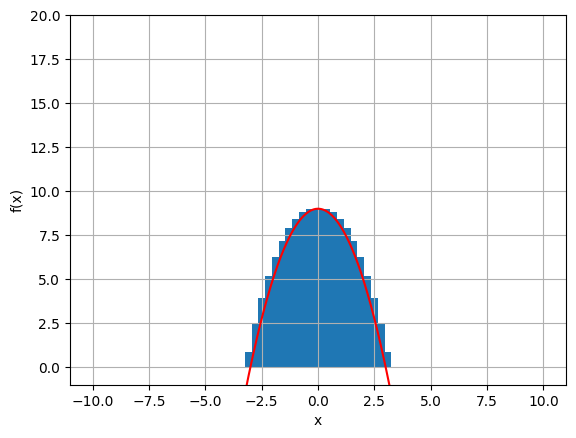

Pole pod krzywą wielomianu wynosi: 36.044999999999995


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import json

def calka_wielomian(wektor_wspolczynkiow, L_prostokatow, dolna_granica, gorna_granica):
    pole = 0
    delta_x = (gorna_granica - dolna_granica)/L_prostokatow
    srodki_przedziałów = np.linspace(dolna_granica + delta_x/2, gorna_granica - delta_x/2, L_prostokatow)
    wysokosci_prostokatow = np.zeros(len(srodki_przedziałów))
    for i in range(len(srodki_przedziałów)):
        wysokosci_prostokatow[i] = roz_wielomianu(wektor_wspolczynkiow, srodki_przedziałów[i])
        if wysokosci_prostokatow[i] < 0:
            wysokosci_prostokatow[i] = 0

        pole += delta_x * wysokosci_prostokatow[i]

    return pole, wysokosci_prostokatow, srodki_przedziałów

def roz_wielomianu(wielomian, x):
    suma = 0
    for i in range(len(wielomian)):
        suma += wielomian[i] * x**i
    
    return suma

"""
wielomian =  np.array(json.loads(input("Podaj wielomian indexuj od wyrazu wolnego: ")))
dolna_granica = float(json.loads(input("Podaj przedzial calkowania od a: ")))
gorna_granica = float(json.loads(input("Podaj przedzial calkowania do b: ")))
"""
wielomian = [9, 0, -1]
dolna_granica = - 3
gorna_granica = 3
x_wiel = np.linspace(-10, 10, 1000)
y_wiel = np.zeros(len(x_wiel))
L_prostokatow = 20

for i in range(len(x_wiel)):
    y_wiel[i] = roz_wielomianu(wielomian, x_wiel[i])

pole, wysokosci_prostokatow, srodki_przedziałów = calka_wielomian(wielomian, L_prostokatow, dolna_granica, gorna_granica)

plt.figure()
plt.ylabel("f(x)")
plt.xlabel("x")
plt.ylim(-1, 20)
plt.bar(srodki_przedziałów, wysokosci_prostokatow)
plt.plot(x_wiel, y_wiel, 'r')
plt.grid()
plt.show()

print(f"Pole pod krzywą wielomianu wynosi: {pole}")

Oblicznie pola pod krzywą wielomianu - metodą Trapezu

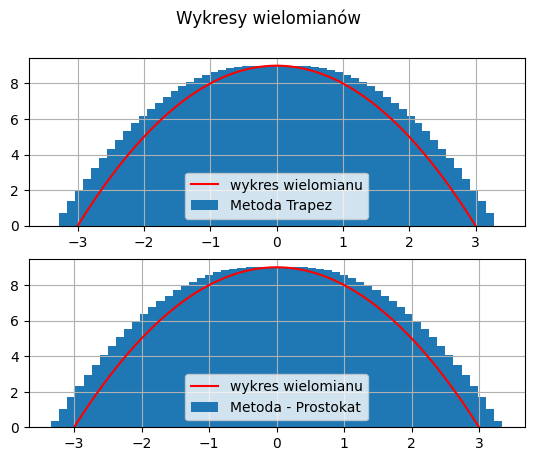

Pole pod krzywą wielomianu (trapez) wynosi: 35.94326399999999
Pole pod krzywą wielomianu (prostoka) wynosi: 36.00719999999999


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import json

def calka_wielomian_pr(wektor_wspolczynkiow, L_prostokatow, dolna_granica, gorna_granica):
    pole = 0
    delta_x = (gorna_granica - dolna_granica)/L_prostokatow
    srodki_przedziałów = np.linspace(dolna_granica + delta_x/2, gorna_granica - delta_x/2, L_prostokatow)
    wysokosci_prostokatow = np.zeros(len(srodki_przedziałów))
    for i in range(len(srodki_przedziałów)):
        wysokosci_prostokatow[i] = wielomian_row(wektor_wspolczynkiow, srodki_przedziałów[i])
        if wysokosci_prostokatow[i] < 0:
            wysokosci_prostokatow[i] = 0

        pole += delta_x * wysokosci_prostokatow[i]

    return pole, wysokosci_prostokatow, srodki_przedziałów


def calka_wielomian_tr(wektor_wspolczynkiow, L_prostokatow, dolna_granica, gorna_granica):
    pole = 0
    wysokosc_trapezu = (gorna_granica - dolna_granica)/L_prostokatow
    granice_przedzialow = np.linspace(dolna_granica, gorna_granica, L_prostokatow + 1)
    dlugosci_bokow = np.zeros(len(granice_przedzialow))
    dlugosci_bokow[0] = wielomian_row(wektor_wspolczynkiow, granice_przedzialow[0])
    if dlugosci_bokow[0] < 0:
        dlugosci_bokow[0] = 0
    for i in range(1, L_prostokatow):
        dlugosci_bokow[i] = wielomian_row(wektor_wspolczynkiow, granice_przedzialow[i])
        if dlugosci_bokow[i] < 0:
            dlugosci_bokow[i] = 0
        pole += (dlugosci_bokow[i - 1] + dlugosci_bokow[i])*wysokosc_trapezu/2
    
    return pole, granice_przedzialow, dlugosci_bokow

def wielomian_row(wielomian, x):
    suma = 0 
    for i in range(len(wielomian)):
        suma += wielomian[i]*x**i
    
    return suma

L_prostokatow = 50
N = 1000
"""
wielomian = np.array(json.loads(input("Podaj wielomian indexuj od wyrazu wolnego: ")))
dolna_granica = float(input("Podaj dolna granice calki: "))
gorna_granica = float(input("Podaj gorna granice calki: "))
"""
wielomian = [9, 0, -1]
dolna_granica = - 3
gorna_granica = 3
x_wiel = np.linspace(dolna_granica, gorna_granica, N)
y_wiel = np.zeros(N)
for i in range(N):
    y_wiel[i] = wielomian_row(wielomian, x_wiel[i])

pole_1, granice_przedzialow, dlugosci_bokow = calka_wielomian_tr(wielomian, L_prostokatow, dolna_granica, gorna_granica)
pole_2, wysokosci_prostokatow, srodki_przedziałów = calka_wielomian_pr(wielomian, L_prostokatow, dolna_granica, gorna_granica)

fig, (ax1, ax2) = plt.subplots(2, 1)
plt.suptitle("Wykresy wielomianów")
ax1.plot(x_wiel, y_wiel, 'r', label="wykres wielomianu")
ax1.bar(granice_przedzialow, dlugosci_bokow, label="Metoda Trapez")
ax1.legend()
ax1.grid()
ax2.plot(x_wiel, y_wiel, 'r', label="wykres wielomianu")
ax2.bar(srodki_przedziałów, wysokosci_prostokatow, label="Metoda - Prostokat")
ax2.legend()
ax2.grid()
plt.show()

print(f"Pole pod krzywą wielomianu (trapez) wynosi: {pole_1}")
print(f"Pole pod krzywą wielomianu (prostoka) wynosi: {pole_2}")